In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('./functions')

from box_io import load_beeframe_meta_from_box
from comb_loading import get_organized_colony_names
from comb_loading import load_colony_comb  
from mask_processing import get_class_contours
from comb_growth import get_perpendicular_growth_at_point

In [4]:
meta_file = "/home/golden/Dropbox/bee-comb/img_to_text_df_TOEDIT.csv"
beeframe_meta = pd.read_csv(meta_file)

In [12]:
# Get names of colonies that have frame order information in 
# img_to_text_df_TOEDIT.csv
colony_names = get_organized_colony_names(beeframe_meta)
print(f"The following colonies have frame order information:")
print(*colony_names)

The following colonies have frame order information:
DD1 DD2 DD4 DD5 DD6 DD7 SH1 SH2 SH3 SH4 SH5 SH6 SH7


In [25]:
masks_folder_root = "/home/golden/kenya_drones/comb-detection/nest_photos"
masks_folder_name = "warped_masks"

colony_name = "DD5"

colony = load_colony_comb(beeframe_meta, colony_name, 
                          masks_folder_root, masks_folder_name,
                          combine_ab=False
                         )

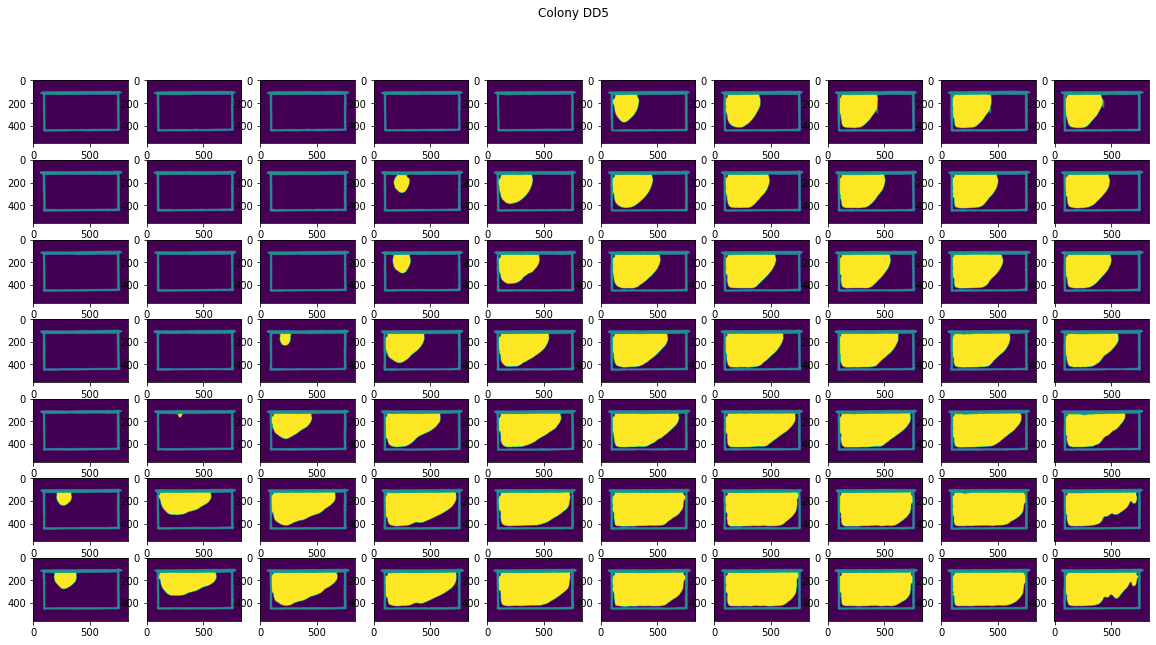

In [27]:
num_weeks = colony.shape[0]
num_frames = colony.shape[1]

fig, axs = plt.subplots(num_weeks, num_frames, figsize=(20, 10))
for week, week_frames in enumerate(colony):
    for frame_ind, frame in enumerate(week_frames):
        axs[week, frame_ind].imshow(frame, vmin=0, vmax=2)
        
_ = fig.suptitle(f"Colony {colony_name}")